## Importing Libraries

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


## Visualizing Single Audio

In [13]:
random_file_name = "./blues.00000.wav"

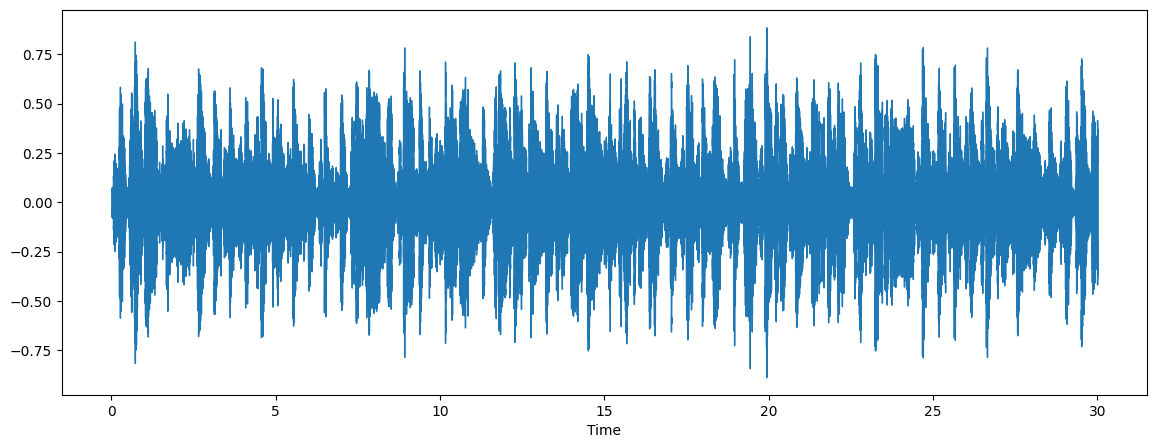

In [14]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

## PLaying Sound

In [15]:
from IPython.display import Audio
Audio(data=y, rate=sr)

## Doing Visualization on Chunks Of Audio

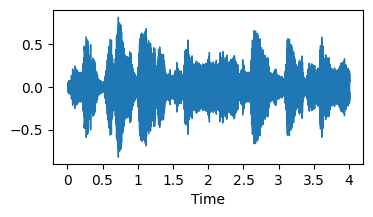

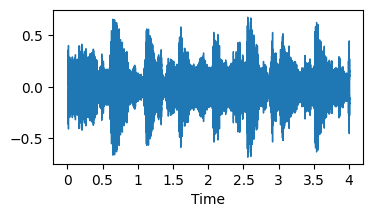

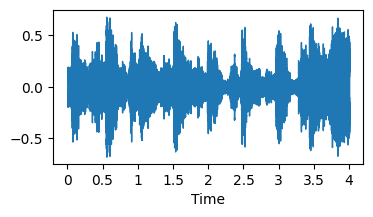

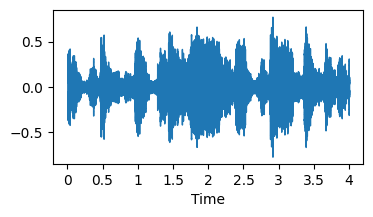

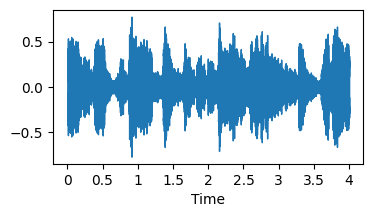

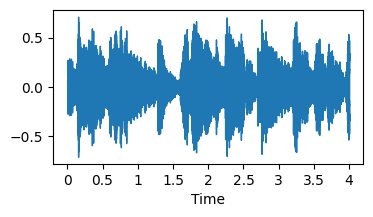

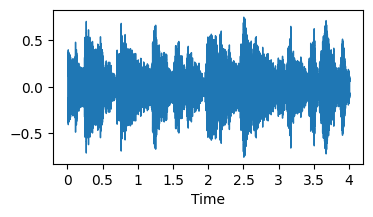

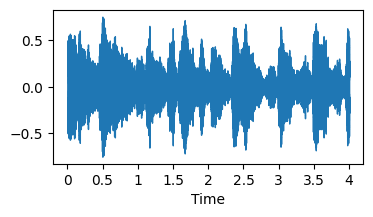

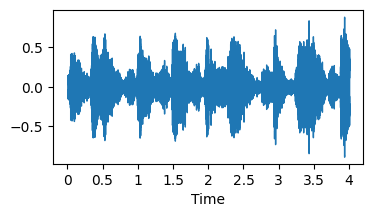

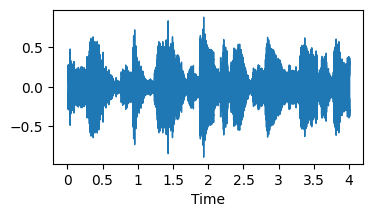

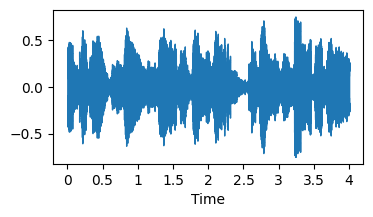

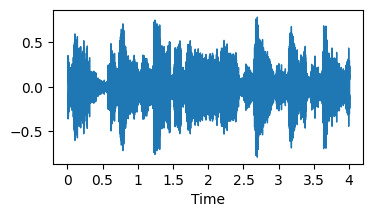

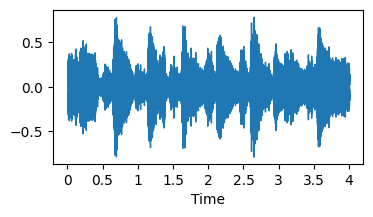

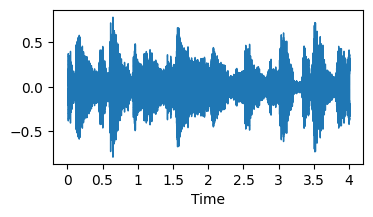

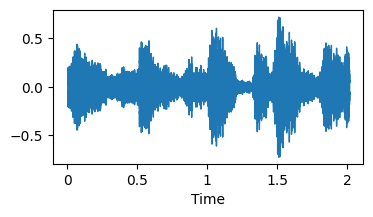

In [19]:
audio_path = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=None) #sr=None to keep the original sampling rate

#define the duration of each chunk and their overlap
chunk_duration = 4
chunk_overlap = 2

#covert duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = chunk_overlap * sr

#calc the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

#iterate over each chunk
for i in range(num_chunks):
    #calc start and end indices of the chunk
    start = i*(chunk_samples-overlap_samples) # will start at i = 0 so 0
    end = start+chunk_samples #end after first iteration will be 0 + 4 ie 4 so we'll move from 0 to 4 chunk_sample ie chunk_duration we will ignore sr here as it is only for extracting values from arrat y
    #Extract the chunk audio
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

## Melspectogram Visualization

In [21]:
#plotting melspectogram of the entire audio
def plot_melspectrogram(y,sr):
    #compute spectogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #convert to decibles(log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #visualize spectogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("spectogram")
    plt.tight_layout()
    plt.show()

In [22]:
random_file_name = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

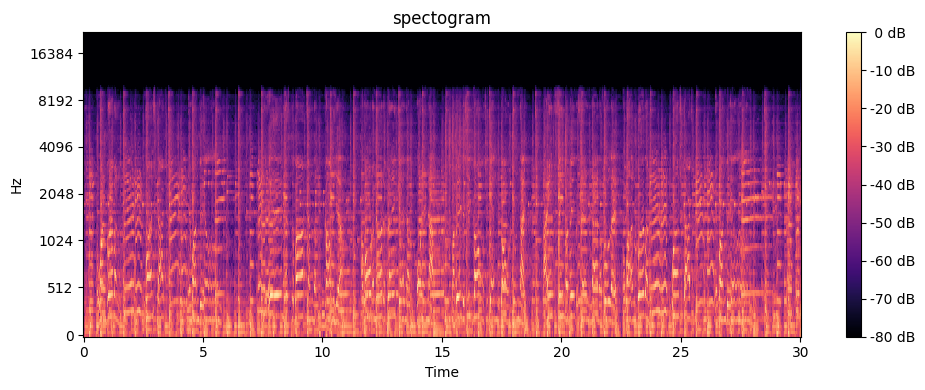

In [23]:
plot_melspectrogram(y,sr)

In [30]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and their overlap
    chunk_duration = 4
    chunk_overlap = 2
    
    #covert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = chunk_overlap * sr
    
    #calc the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunk
    for i in range(num_chunks):
        #calc start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples) # will start at i = 0 so 0
        end = start+chunk_samples #end after first iteration will be 0 + 4 ie 4 so we'll move from 0 to 4 chunk_sample ie chunk_duration we will ignore sr here as it is only for extracting values from arrat y
        #Extract the chunk audio
        chunk = y[start:end]
        #melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #visualize spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("spectrogram")
        plt.tight_layout()
        plt.show()
    


In [31]:
random_file_name = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


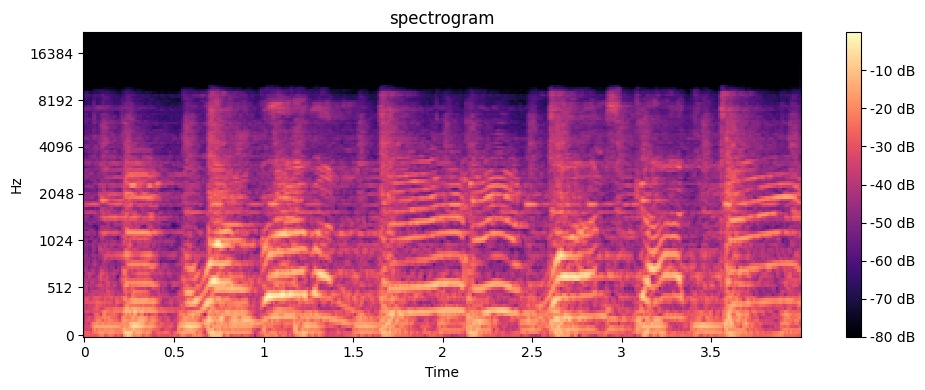

(128, 345)


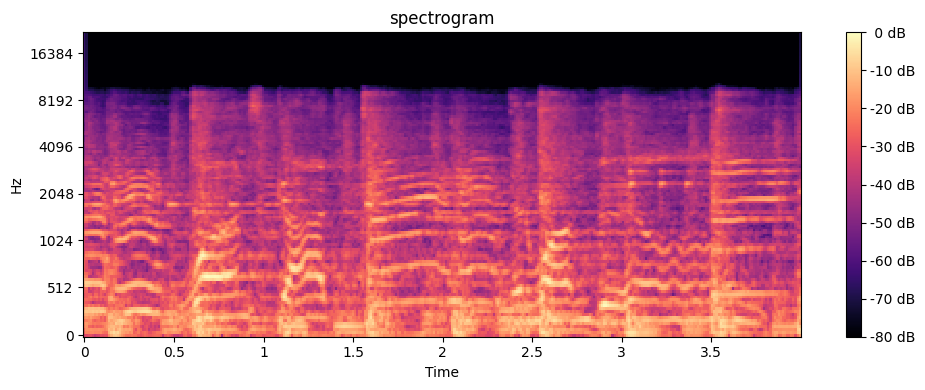

(128, 345)


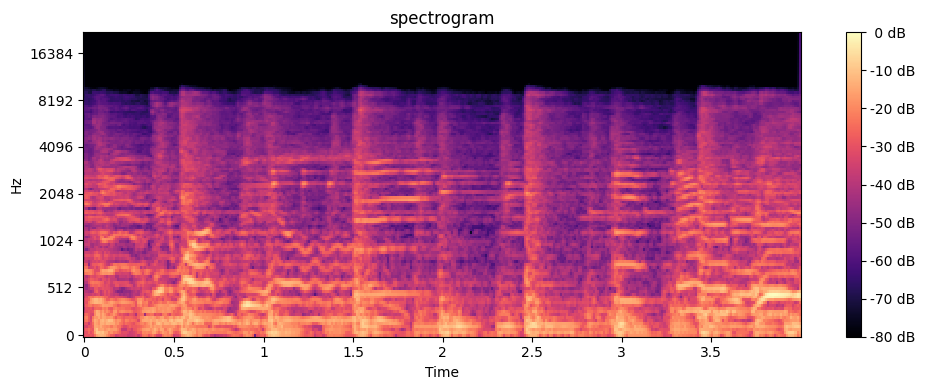

(128, 345)


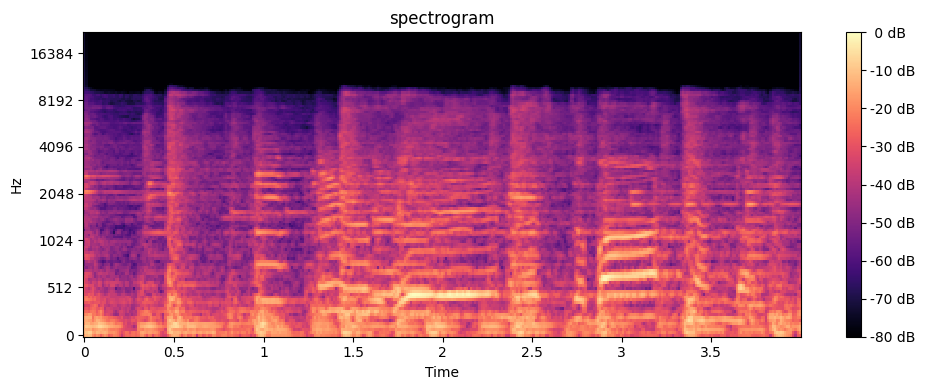

(128, 345)


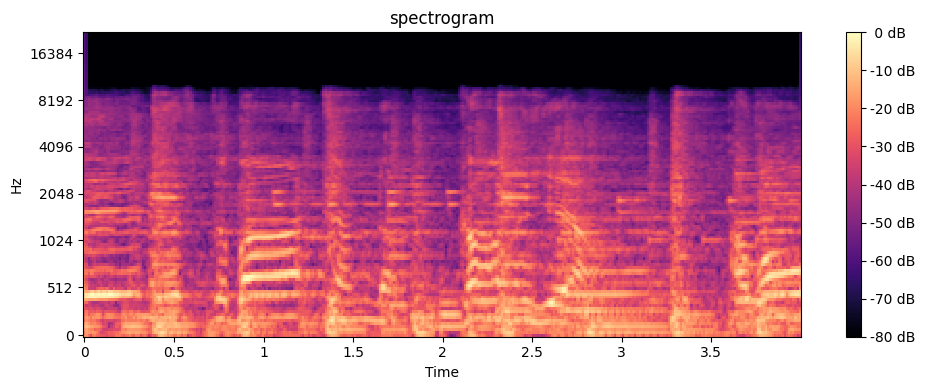

(128, 345)


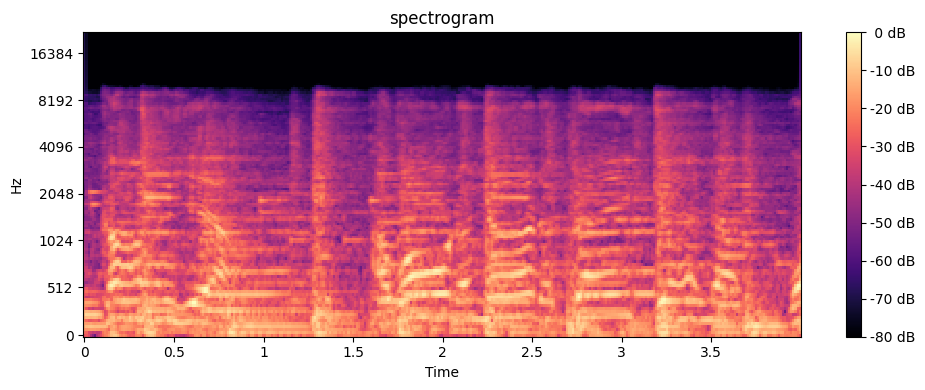

(128, 345)


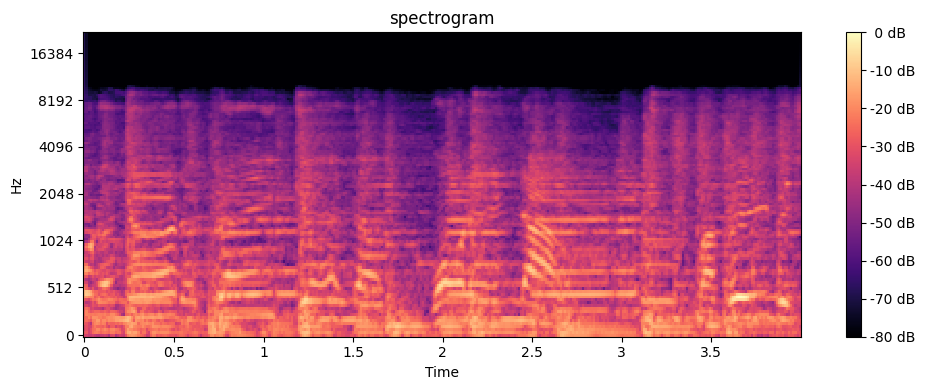

(128, 345)


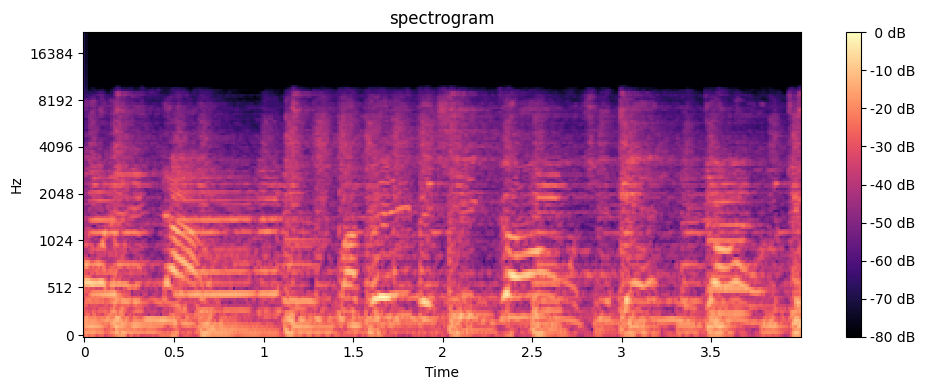

(128, 345)


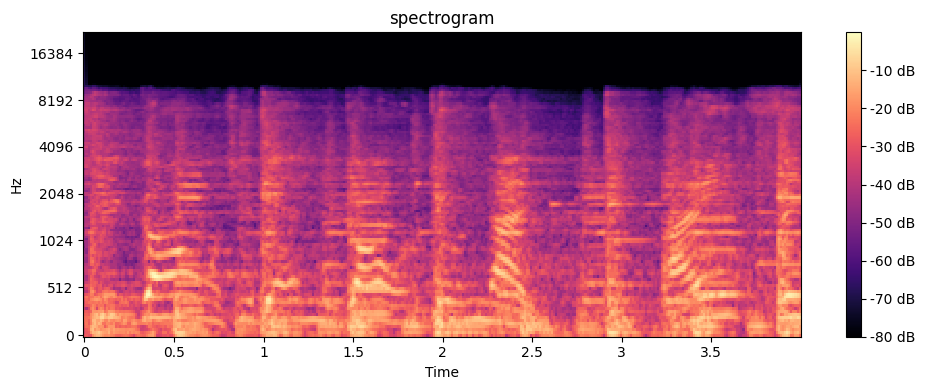

(128, 345)


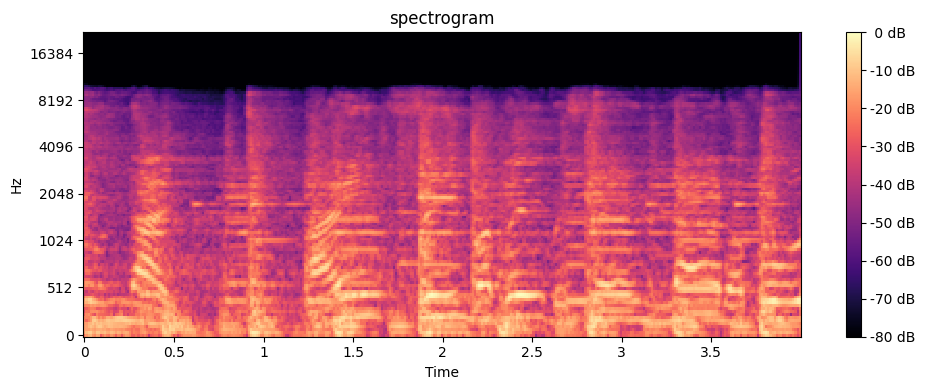

(128, 345)


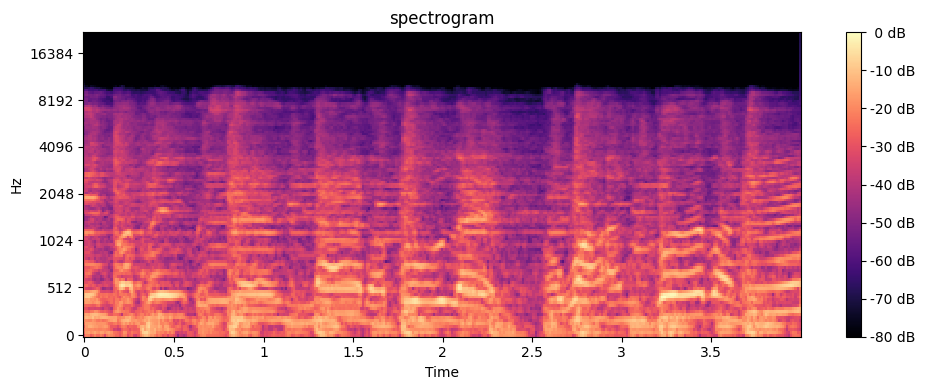

(128, 345)


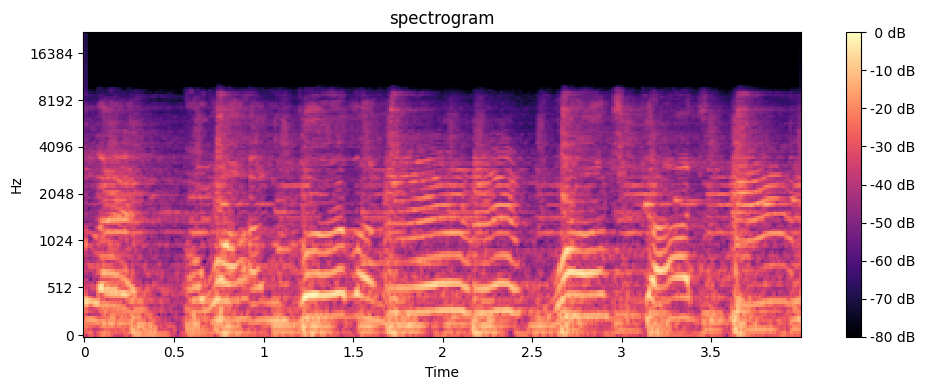

(128, 345)


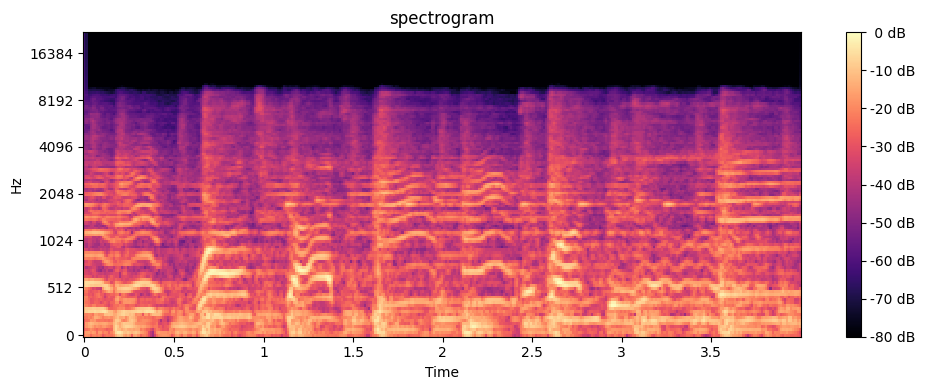

(128, 345)


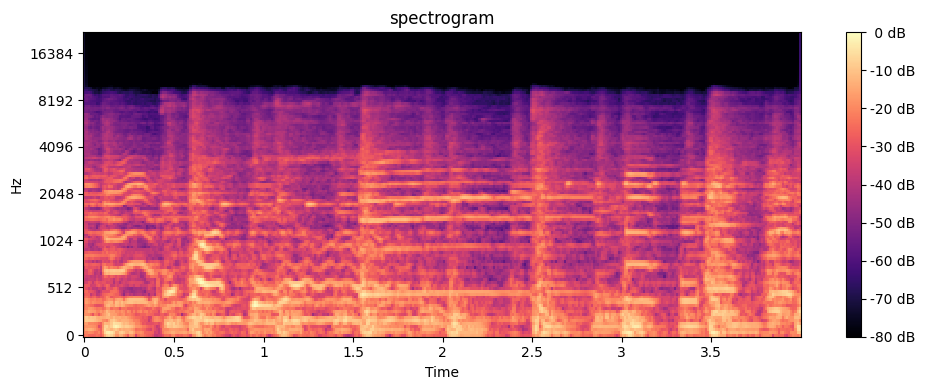

(128, 174)


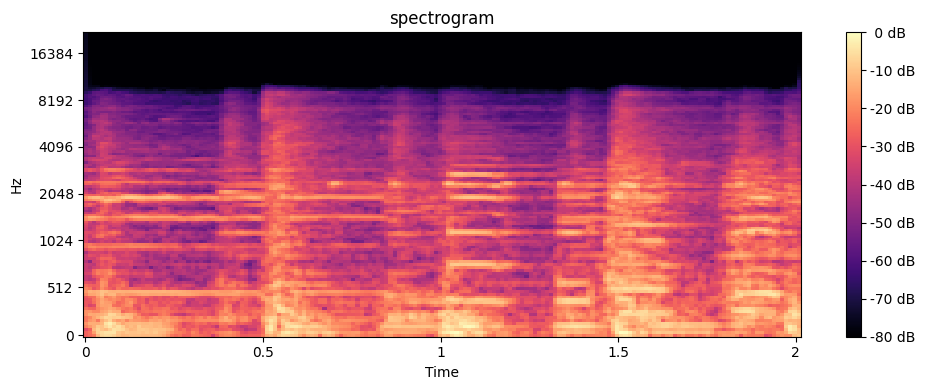

In [32]:
plot_melspectrogram_chunks(y,sr)

In [33]:
128*345

44160

In [37]:
210*210

44100

## Data Preprocessing

In [3]:
#define your filder structure
data_dir = "./genres_original"
classes = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [4]:
from tensorflow.image import resize
#Load and Preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(210,210)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("dude lemme learn this shit--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #performing preprocessing
                #define the duration of each chunk and their overlap
                chunk_duration = 4
                chunk_overlap = 2
                
                #covert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = chunk_overlap * sample_rate
                
                #calc the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunk
                for i in range(num_chunks):
                    #calc start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples) # will start at i = 0 so 0
                    end = start+chunk_samples #end after first iteration will be 0 + 4 ie 4 so we'll move from 0 to 4 chunk_sample ie chunk_duration we will ignore sr here as it is only for extracting values from arrat y
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
        #return
    return np.array(data),np.array(labels)

In [5]:
data,labels = load_and_preprocess_data(data_dir,classes)

dude lemme learn this shit-- blues
dude lemme learn this shit-- classical
dude lemme learn this shit-- country
dude lemme learn this shit-- disco
dude lemme learn this shit-- hiphop
dude lemme learn this shit-- jazz
dude lemme learn this shit-- metal
dude lemme learn this shit-- pop
dude lemme learn this shit-- reggae
dude lemme learn this shit-- rock


In [6]:
data.shape

(14975, 210, 210, 1)

In [7]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) #converting labels to one_hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
labels.shape

(14975, 10)

In [13]:
!pip install scikit-learn

## Splitting of Dataset into Training and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [62]:
X_train.shape

(11980, 210, 210, 1)

In [63]:
X_test.shape

(2995, 210, 210, 1)

In [64]:
Y_train.shape

(11980, 10)

In [65]:
Y_test.shape

(2995, 10)

## Building Model

In [66]:
model = tf.keras.models.Sequential()

In [67]:
X_train[0].shape

(210, 210, 1)

In [68]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [69]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [70]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [71]:
model.add(Dropout(0.3))

In [72]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [73]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Dropout(0.3))

In [75]:
model.add(Flatten())

In [76]:
model.add(Dense(units=1200,activation='relu'))

In [77]:
model.add(Dropout(0.45))

In [78]:
#output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 210, 210, 32)      320       
                                                                 
 conv2d_21 (Conv2D)          (None, 208, 208, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 104, 104, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 104, 104, 64)      18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 102, 102, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 51, 51, 64)       0         
 g2D)                                                 

In [80]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True,
    verbose=1
)

In [81]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
#Training
training_history = model.fit(
    X_train, Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
375/375 [==============================] - 2217s 6s/step - loss: 1.9094 - accuracy: 0.2960 - val_loss: 1.6601 - val_accuracy: 0.4027
Epoch 2/30
375/375 [==============================] - 1937s 5s/step - loss: 1.3460 - accuracy: 0.5172 - val_loss: 1.1557 - val_accuracy: 0.5917
Epoch 3/30
375/375 [==============================] - 1673s 4s/step - loss: 1.0720 - accuracy: 0.6297 - val_loss: 0.9602 - val_accuracy: 0.6668
Epoch 4/30
375/375 [==============================] - 2327s 6s/step - loss: 0.8817 - accuracy: 0.7000 - val_loss: 0.8120 - val_accuracy: 0.7299
Epoch 5/30
375/375 [==============================] - 5833s 16s/step - loss: 0.7035 - accuracy: 0.7627 - val_loss: 0.8098 - val_accuracy: 0.7155
Epoch 6/30
375/375 [==============================] - 5751s 15s/step - loss: 0.5892 - accuracy: 0.7993 - val_loss: 0.5684 - val_accuracy: 0.8154
Epoch 7/30
375/375 [==============================] - 5824s 16s/step - loss: 0.4644 - accuracy: 0.8414 - val_loss: 0.4777 - val_accura

In [84]:
model.save("Trained_model.h5")

In [85]:
training_history.history

{'loss': [1.9093539714813232,
  1.346042513847351,
  1.072005033493042,
  0.8816637992858887,
  0.7035205364227295,
  0.5892134308815002,
  0.4644249677658081,
  0.4080345630645752,
  0.33765360713005066,
  0.2725521922111511,
  0.23124343156814575,
  0.19241484999656677,
  0.17914888262748718,
  0.15922853350639343,
  0.12815557420253754,
  0.11854667961597443,
  0.1169692799448967,
  0.09629665315151215,
  0.09126261621713638,
  0.07734227925539017,
  0.08130824565887451,
  0.06535863876342773,
  0.06109699606895447,
  0.07111871987581253,
  0.06804532557725906,
  0.03287418186664581],
 'accuracy': [0.2959933280944824,
  0.5171953439712524,
  0.6297162175178528,
  0.699999988079071,
  0.7626878023147583,
  0.7993322014808655,
  0.8414023518562317,
  0.8592654466629028,
  0.8850584030151367,
  0.904090166091919,
  0.9201168417930603,
  0.9346410632133484,
  0.9399833083152771,
  0.9485809803009033,
  0.9565108418464661,
  0.9602671265602112,
  0.9620200395584106,
  0.9674457311630249,

In [86]:
#Recordin Hostory in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

## Model Evaluation -I

In [87]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 [==============================] - 448s 1s/step - loss: 0.0280 - accuracy: 0.9939


In [89]:
train_loss,train_accuracy

(0.027958832681179047, 0.9939064979553223)

In [88]:
#Model Eval on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 [==============================] - 103s 1s/step - loss: 0.2458 - accuracy: 0.9242


In [90]:
val_loss,val_accuracy

(0.24583429098129272, 0.9242070317268372)

In [93]:
training_history.history

{'loss': [1.9093539714813232,
  1.346042513847351,
  1.072005033493042,
  0.8816637992858887,
  0.7035205364227295,
  0.5892134308815002,
  0.4644249677658081,
  0.4080345630645752,
  0.33765360713005066,
  0.2725521922111511,
  0.23124343156814575,
  0.19241484999656677,
  0.17914888262748718,
  0.15922853350639343,
  0.12815557420253754,
  0.11854667961597443,
  0.1169692799448967,
  0.09629665315151215,
  0.09126261621713638,
  0.07734227925539017,
  0.08130824565887451,
  0.06535863876342773,
  0.06109699606895447,
  0.07111871987581253,
  0.06804532557725906,
  0.03287418186664581],
 'accuracy': [0.2959933280944824,
  0.5171953439712524,
  0.6297162175178528,
  0.699999988079071,
  0.7626878023147583,
  0.7993322014808655,
  0.8414023518562317,
  0.8592654466629028,
  0.8850584030151367,
  0.904090166091919,
  0.9201168417930603,
  0.9346410632133484,
  0.9399833083152771,
  0.9485809803009033,
  0.9565108418464661,
  0.9602671265602112,
  0.9620200395584106,
  0.9674457311630249,

## Accuracy and Loss Visualization

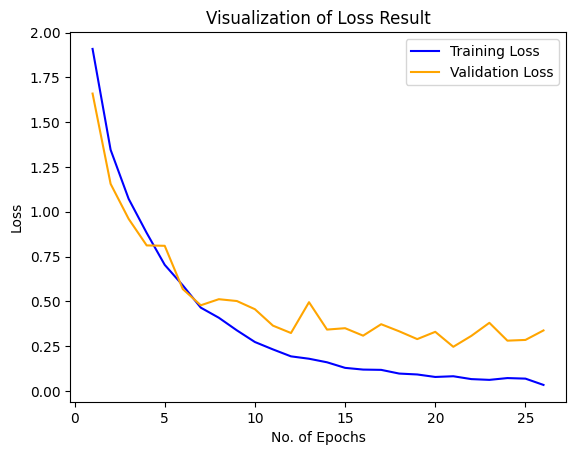

In [103]:
epochs = [i for i in range(1,27)]
plt.plot(epochs,training_history.history['loss'],label="Training Loss",color='blue')
plt.plot(epochs,training_history.history['val_loss'],label="Validation Loss",color='orange')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

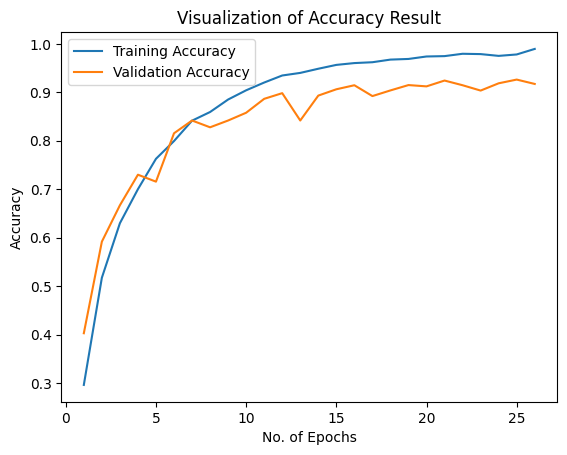

In [105]:
# Visualization of Accuracy
epochs = [i for i in range(1,27)]
plt.plot(epochs,training_history.history['accuracy'],label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [10]:
#reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 210, 210, 32)      320       
                                                                 
 conv2d_21 (Conv2D)          (None, 208, 208, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 104, 104, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 104, 104, 64)      18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 102, 102, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 51, 51, 64)       0         
 g2D)                                                 

In [11]:
import json

# Load training history from JSON file
with open('training_hist.json', 'r') as f:
    history_dict = json.load(f)


In [12]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Precison,Recall,Confusion Matrix - Model Evaluation - II

In [14]:
X_test.shape

(2995, 210, 210, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 108s 1s/step


array([[3.10354924e-04, 1.00244806e-05, 5.10275550e-03, ...,
        8.16693604e-01, 1.54821656e-03, 1.22993827e-01],
       [1.64535887e-08, 1.45137049e-12, 4.79309925e-10, ...,
        1.61828092e-12, 1.54373503e-09, 1.26380146e-05],
       [9.82159798e-10, 4.75864077e-08, 4.78699524e-09, ...,
        6.26673113e-09, 6.08869000e-09, 1.51681630e-02],
       ...,
       [9.99981403e-01, 3.75582112e-16, 1.42791096e-05, ...,
        1.88681570e-14, 3.88713761e-06, 3.86406072e-07],
       [2.56002555e-03, 8.10960829e-01, 2.15455727e-03, ...,
        1.70898624e-02, 8.56877044e-02, 1.92346238e-02],
       [4.01636213e-03, 1.48094665e-08, 1.92397647e-03, ...,
        2.99174571e-04, 8.96332692e-03, 4.50189505e-03]], dtype=float32)

In [16]:
y_pred.shape 

(2995, 10)

In [17]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [18]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
Y_test.shape

(2995, 10)

In [20]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
#precision recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.92      0.92      0.92       302
   classical       0.97      0.97      0.97       298
     country       0.81      0.91      0.86       317
       disco       0.96      0.91      0.94       312
      hiphop       0.95      0.96      0.96       277
        jazz       0.93      0.94      0.93       311
       metal       0.99      0.97      0.98       302
         pop       0.97      0.86      0.91       289
      reggae       0.91      0.93      0.92       296
        rock       0.86      0.87      0.86       291

    accuracy                           0.92      2995
   macro avg       0.93      0.92      0.93      2995
weighted avg       0.93      0.92      0.92      2995



## Confusion Matrix Visualization

In [23]:
cm

array([[277,   0,  15,   0,   1,   5,   0,   1,   1,   2],
       [  1, 288,   0,   0,   0,   7,   0,   1,   0,   1],
       [  6,   1, 290,   1,   0,   6,   0,   2,   1,  10],
       [  5,   1,   0, 285,   2,   1,   0,   0,   9,   9],
       [  1,   0,   2,   2, 267,   0,   0,   1,   4,   0],
       [  4,   2,   5,   0,   2, 292,   0,   0,   0,   6],
       [  0,   0,   4,   0,   1,   0, 293,   0,   0,   4],
       [  3,   3,   9,   3,   6,   2,   0, 249,   6,   8],
       [  3,   0,   9,   3,   1,   1,   0,   2, 275,   2],
       [  1,   2,  25,   2,   0,   0,   2,   2,   5, 252]], dtype=int64)

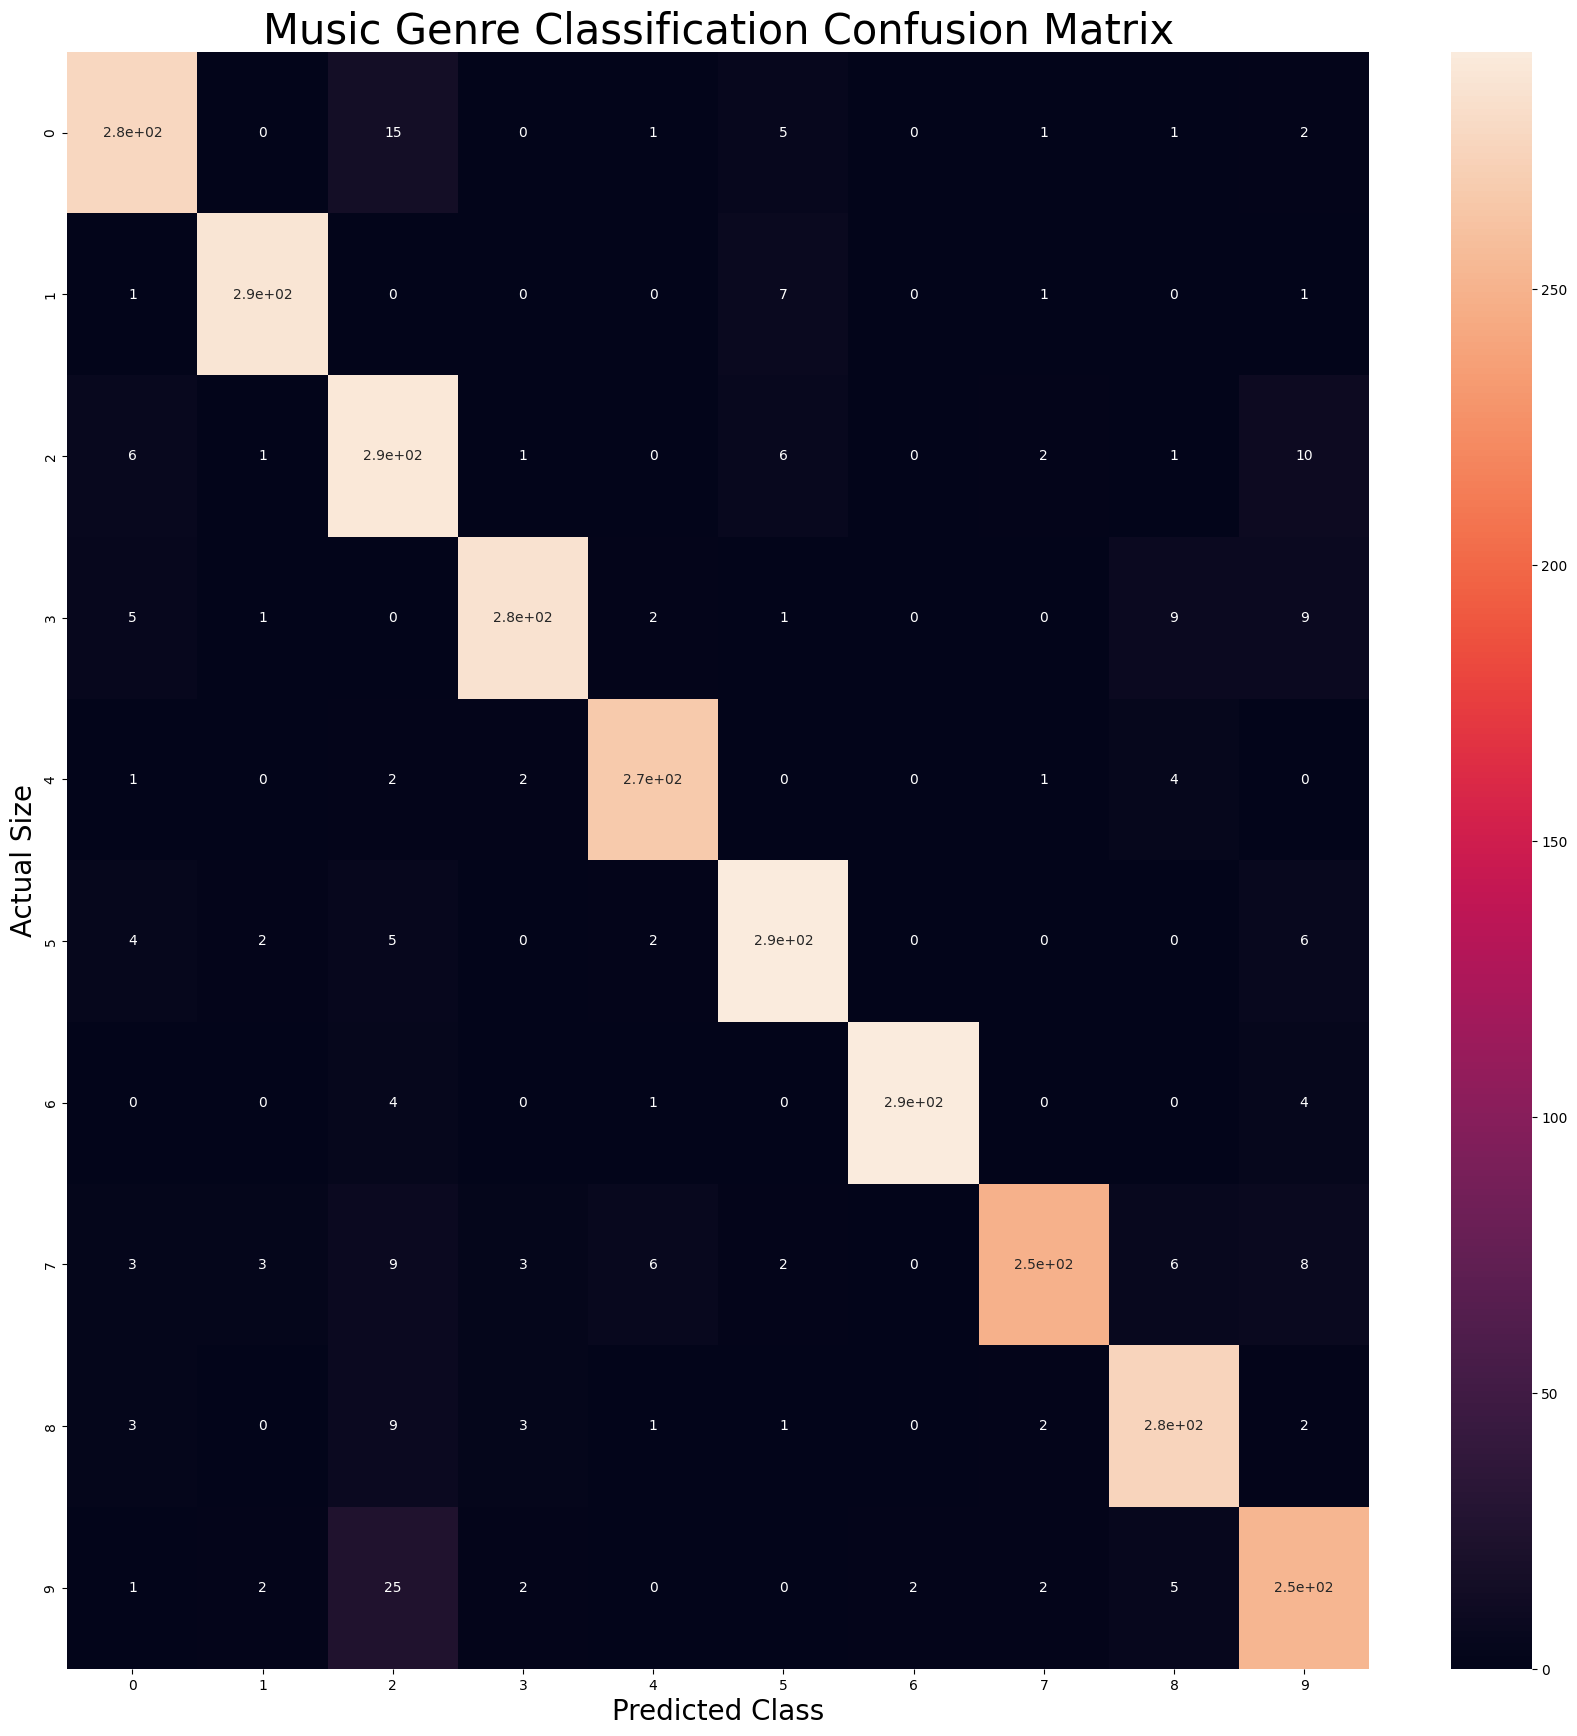

In [26]:
import seaborn as sns
plt.figure(figsize=(21,21))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Size", fontsize=20)
plt.title("Music Genre Classification Confusion Matrix", fontsize=30)
plt.show()